<a href="https://colab.research.google.com/github/GuCuChiara/Prediccion-de-evento-coronario-Framingham_CHD/blob/main/Framingham_CHD_Prediction_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generación y validación de un modelo predictivo de riesgo cardiovascular:


# Framingham_CHD

* El **Framingham Heart Study** es un estudio epidemiológico longitudinal que comenzó en 1948 en la ciudad de Framingham, Massachusetts, y ha sido fundamental para la comprensión de las enfermedades cardiovasculares (ECV).

* El **Framingham CHD (Coronary Heart Disease) Dataset** es un subconjunto de datos de este estudio y se utiliza comúnmente en investigaciones médicas y proyectos de machine learning relacionados con la predicción del riesgo de enfermedad coronaria (CHD).

* Este dataset es popular para modelos de clasificación que predicen la probabilidad de desarrollar una enfermedad coronaria a lo largo de 10 años.



---



In [2]:
# montar carpeta google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




## Preprocesamiento en Google Colab:





---



## Importamos librerías:

In [3]:
# Importamos las librerías necesarias
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.target import FeatureCorrelation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc



---



## Cargamos el dataset:

In [4]:
# Cargamos el dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_preprocessed.csv")

##Estructura del Dataset
**Este dataset contiene una variedad de variables clínicas y de estilo de vida, como:**

* Edad **(age):** Edad de la persona.
* Sexo **(sex):** Género (generalmente codificado como 1 para hombres y 0 para mujeres).
* Cantidad de medicamentos que toma si tiene HTA **(BPMeds)**
* Presión Arterial **(sysBP y diaBP):** Presión arterial sistólica y diastólica.
* Colesterol Total **(totChol):** Nivel de colesterol total.
* Nivel de Glucosa **(glucose):** Nivel de glucosa en sangre.
* Fumador **(currentSmoker):** Indicador de si la persona es fumadora.
* Diabetes **(diabetes):** Indicador de si la persona tiene diabetes.
* Índice de Masa Corporal (IMC) **(BMI):** Una medida basada en la altura y el peso de la persona.
* Historia Familiar de ECV **(prevalentStroke y prevalentHyp):** Indicadores de si la persona tiene historia familiar de accidente cerebrovascular o hipertensión.
* Enfermedad Coronaria **(TenYearCHD):** Objetivo del dataset, que indica si la persona desarrolló una enfermedad coronaria en un periodo de 10 años.




---



In [ ]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0




---



## Comprobarmos si hay valores faltantes en el conjunto de datos

In [ ]:
# Comprobarmos si hay valores faltantes en el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


##Evaluamos la variable objetivo para descubrir una posible asimetría en los datos.

[Text(0, 0, '3505')]

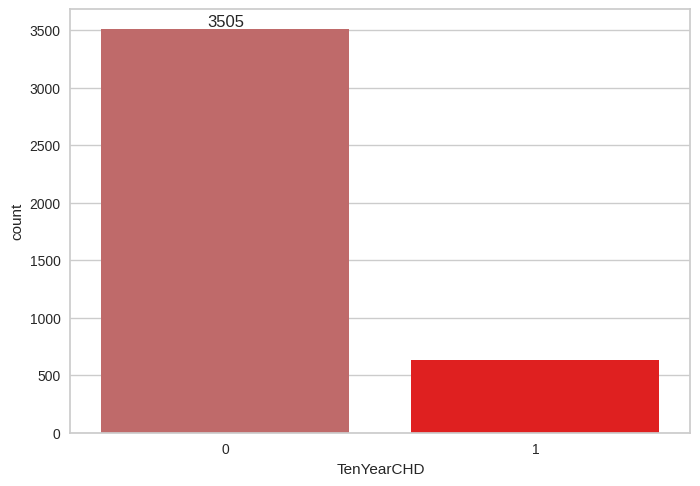

In [ ]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= df["TenYearCHD"], palette= cols)
ax.bar_label(ax.containers[0])

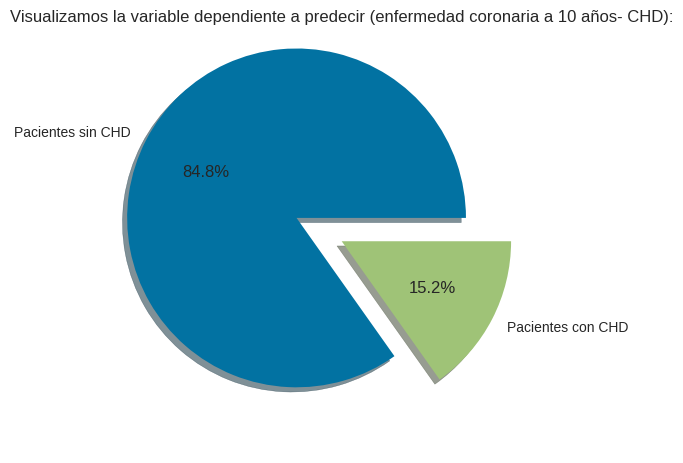

In [ ]:
plt.title("Visualizamos la variable dependiente a predecir (enfermedad coronaria a 10 años- CHD):")
plt.pie(np.array(df["TenYearCHD"].value_counts()),labels=['Pacientes sin CHD','Pacientes con CHD'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

### Estudiamos los valores de la columna target, "TenYearCHD"

In [ ]:
# Estudiamos los valores de la columna target, "TenYearCHD"
CHD_counts = df['TenYearCHD'].value_counts()

print("Hay un desequilibrio en el conjunto de datos, en favor del grupo de pacientes sin CHD:")
print(f"\nValores correspondientes a Pacientes sin CHD: {(CHD_counts[0])}")
print(f"\nValores correspondientes a Pacientes con CHD: {(CHD_counts[1])}")

Hay un desequilibrio en el conjunto de datos, en favor del grupo de pacientes sin CHD:

Valores correspondientes a Pacientes sin CHD: 3505

Valores correspondientes a Pacientes con CHD: 628




---



## Realizamos análisis univariado para la descripción estadística y la comprensión de la dispersión de datos:

In [ ]:
# Análisis univariado:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4133.0,0.427293,0.494745,0.00,0.00,0.00,1.00,1.0
age,4133.0,49.557222,8.561628,32.00,42.00,49.00,56.00,70.0
education,4133.0,0.280668,0.449380,0.00,0.00,0.00,1.00,1.0
currentSmoker,4133.0,0.494798,0.500033,0.00,0.00,0.00,1.00,1.0
cigsPerDay,4133.0,9.101621,11.918440,0.00,0.00,0.00,20.00,70.0
BPMeds,4133.0,0.034358,0.182168,0.00,0.00,0.00,0.00,1.0
prevalentStroke,4133.0,0.006049,0.077548,0.00,0.00,0.00,0.00,1.0
prevalentHyp,4133.0,0.311154,0.463022,0.00,0.00,0.00,1.00,1.0
diabetes,4133.0,0.025647,0.158100,0.00,0.00,0.00,0.00,1.0
totChol,4133.0,236.664408,43.909188,107.00,206.00,234.00,262.00,600.0




---



# Realizamos un análisis bivariado examinando una matriz de correlación de todas las características utilizando un heatmap:

<Axes: >

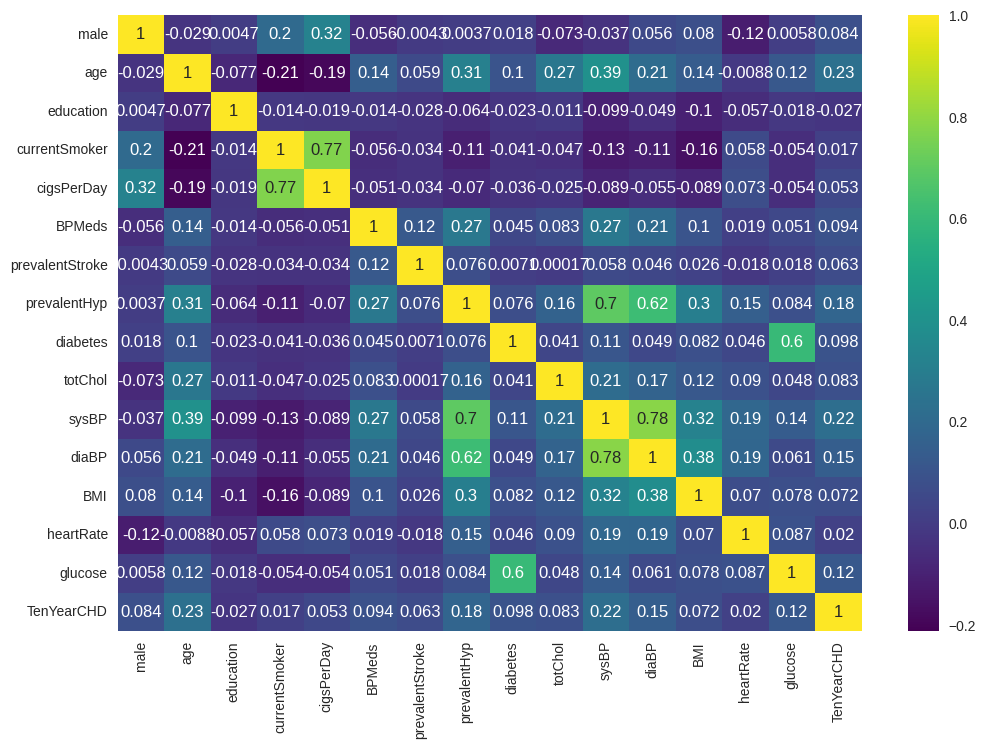

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<Axes: >

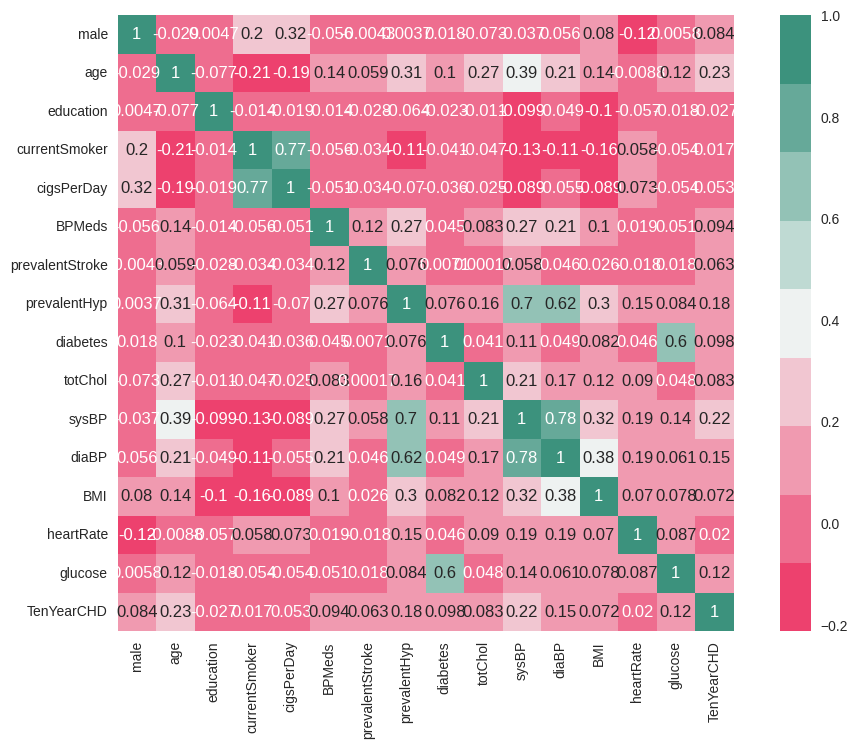

In [ ]:
#Bivariate Analysis,(Análisis bivariado, mediante el examen de una matriz de correlación de todas las características utilizando un mapa de calor)
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)



---



## Evaluamos la distribución de la edad en nuestro Dataset

Text(0.5, 1.0, 'Distribution Of Edad')

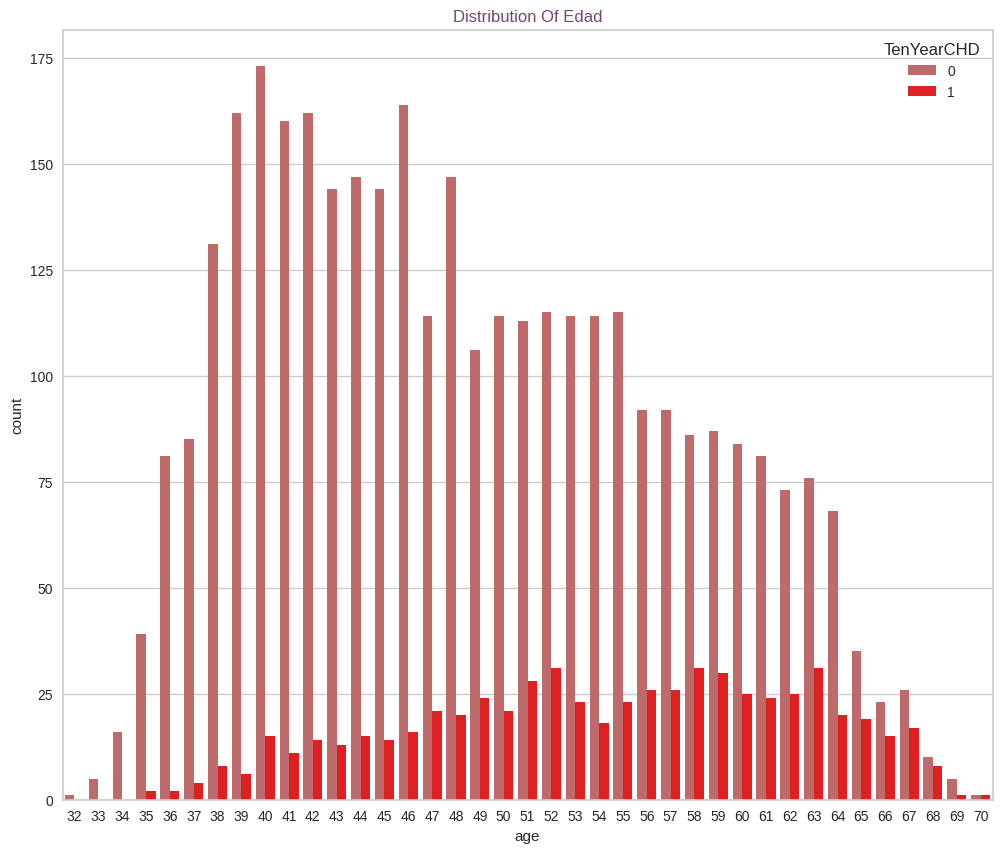

In [ ]:
#Que distribución de edad tenemos en nuestro Dataset?
plt.figure(figsize=(12,10))
Days_of_week=sns.countplot(x=df['age'],data=df, hue ="TenYearCHD",palette = cols)
Days_of_week.set_title("Distribution Of Edad", color="#774571")



---



## Evaluamos la distribución del sexo en nuestro Dataset

Text(0.5, 1.0, 'Distribución del sexo (Sexo_Fem = 0)')

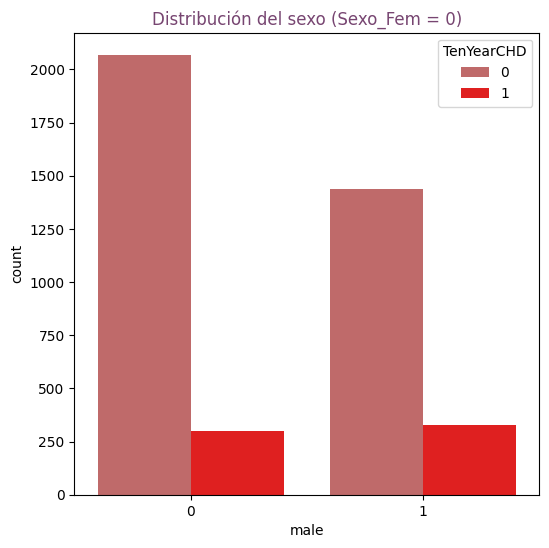

In [ ]:
#Evaluamos la distribución del sexo en nuestro Dataset
plt.figure(figsize=(6,6))
Days_of_week=sns.countplot(x=df['male'],data=df, hue ="TenYearCHD",palette = cols)
Days_of_week.set_title("Distribución del sexo (Sexo_Fem = 0)", color="#774571")



---



##Lo que sigue:

* Seleccionamos algunas comorbilidades como variables independientes y el riesgo de mortalidad como variable objetivo.

* Escalamos nuestros datos.

* luego dividimos los datos en un conjunto de entrenamiento y uno de prueba.

* Creamos un modelo con redes neuronales y lo entrenamos con los datos de entrenamiento

* hacemos predicciones con los datos de prueba.

* evaluamos desempeño.....

In [5]:
# Seleccionamos las "mejores" características (comorbilidades) y la variable objetivo (riesgo de enfermedad coronaria a 10 años)
X = df[['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP','diaBP', 'currentSmoker']]

# Si decidimos tomar todas las variables dependientes:
# X = df.drop(["TenYearCHD"], axis=1)

y = df['TenYearCHD']

In [6]:
X.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker
0,1,0,0,195.0,0,26.97,106.0,70.0,0
1,0,0,0,250.0,0,28.73,121.0,81.0,0
2,1,0,0,245.0,0,25.34,127.5,80.0,1
3,0,1,0,225.0,0,28.58,150.0,95.0,1
4,0,0,0,285.0,0,23.10,130.0,84.0,1




---



# Escalamos los datos:

In [9]:
# Escalamos los datos para mejorar su procesamiento
col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)

In [10]:
# Vemos como quedan nuestros datos escalados
# Acordarse si dps hacemos una predicción por consola o dataset previamente a la predicción: reescalar
X_scaled.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker
0,1.157721,-0.672089,-0.162242,-0.948992,-0.078011,0.292457,-1.194286,-1.077067,-0.989649
1,-0.863766,-0.672089,-0.162242,0.303745,-0.078011,0.724478,-0.514866,-0.156658,-0.989649
2,1.157721,-0.672089,-0.162242,0.189860,-0.078011,-0.107655,-0.220451,-0.240331,1.010459
3,-0.863766,1.487898,-0.162242,-0.265681,-0.078011,0.687658,0.798679,1.014772,1.010459
4,-0.863766,-0.672089,-0.162242,1.100941,-0.078011,-0.657501,-0.107215,0.094363,1.010459


In [28]:
# Aplicamos un submuestreo para equilibrar las clases (nuestros datos están balanceados, ver arriba)
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=22)
X_balanced, y_balanced = undersample.fit_resample(X_scaled, y)
print("-"*100)
print("Ahora tenemos la misma cantidad de pacientes sin y con enfermedad coronaria a 10 años:")
print(y_balanced.value_counts())
print("-"*100)
print("El dataset total se redujo a:")
print(X_balanced.shape)
print(y_balanced.shape)
print("-"*100)

----------------------------------------------------------------------------------------------------
Ahora tenemos la misma cantidad de pacientes sin y con enfermedad coronaria a 10 años:
TenYearCHD
0    628
1    628
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
El dataset total se redujo a:
(1256, 9)
(1256,)
----------------------------------------------------------------------------------------------------


##IMPORTANTE:
###Training Set & Test Set & Overfitting
* **Overfitting** es cuando nos desempeñamos bien con los datos que el modelo ya ha visto, pero no nos desempeñamos bien con los datos nuevos.

* Para darle a un modelo una evaluación justa, nos gustaría saber qué tan bien se desempeñaría nuestro modelo con datos que aún no ha visto.
* Para simular la realización de predicciones sobre nuevos datos que el modelo no ha visto, podemos dividir nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba usando **train_test_split**
* Por lo tanto el set de datos de entrenamiento: (training set) es usado para construir el modelo.
* El set de datos de prueba (test set) será usado para evaluar el rendimiento de nuestro modelo.

## 🩺 Construimos un modelo con Redes Neuronales: 🩺

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [31]:
# Dividimos los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.30, random_state=42, stratify=y_balanced)

# Podemos cambiar el tamaño de nuestro conjunto de entrenamiento usando el parámetro train_size.
# P.ej. train_test_split(X, y, train_size=0.6) colocaría el 60% de los datos en el conjunto de entrenamiento y el 40% en el conjunto de prueba.

# Con .shape vemos el tamaño de nuestro conjuntos de datos
print("Dataset original total:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

Dataset original total: (4133, 9) (4133,)
training set: (879, 9) (879,)
test set: (377, 9) (377,)


In [32]:
# Visualizamos el dataset de entrenamiento
X_train.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker
2917,-0.863766,-0.672089,-0.162242,-1.472863,-0.078011,-0.883331,-1.556643,-2.499517,1.010459
1900,1.157721,-0.672089,-0.162242,-0.607336,-0.078011,-0.034015,0.073964,0.094363,-0.989649
3540,-0.863766,1.487898,-0.162242,1.100941,-0.078011,-0.581406,2.927527,-0.909720,-0.989649
389,1.157721,-0.672089,-0.162242,-0.675667,-0.078011,0.260546,0.006022,-1.411761,1.010459
2734,1.157721,1.487898,-0.162242,-1.040100,-0.078011,1.330782,1.070446,0.680078,-0.989649


In [33]:
# Reshape para que coincida con el formato de entrada de la red neuronal (número de muestras, número de pasos de tiempo, número de características)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))



---



## Construimos el modelo de red neuronal, definimos las capas ocultas, capa de salida, el optimizador, cantidad de épocas, etc:

In [34]:
# Construimos el modelo
model = Sequential()

# Capas de la red neuronal:
# Capa oculta 1
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # 64 neuronas, función de activación ReLU
model.add(Dropout(0.5))  # Dropout del 50%

# Capa oculta 2
#model.add(Dense(64, activation='relu'))  # 64 neuronas, función de activación ReLU
#model.add(Dropout(0.3))  # Dropout del 30%

# Capa oculta 3
model.add(Dense(32, activation='relu'))  # 16 neuronas, función de activación ReLU
model.add(Dropout(0.2))  # Dropout del 20%

# Capa oculta 4
model.add(Dense(16, activation='relu'))  # 8 neuronas, función de activación ReLU
model.add(Dropout(0.2))  # Dropout del 20%

# Capa oculta 5
model.add(Dense(8, activation='relu'))  # 8 neuronas, función de activación ReLU
model.add(Dropout(0.1))  # Dropout del 10%

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con 1 neurona (problema de clasificación binaria), función de activación sigmoide

# Definimos el optimizador Adam con el learning rate deseado
opt = Adam(learning_rate=0.001)  # Por ejemplo, aquí establecemos el learning rate en 0.001

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])  # Función de pérdida entropía cruzada binaria, optimizador Adam

# Definimos tamaño de lote y número de épocas de entrenamiento:
batch_size = 30
epochs = 100



---



## Resumen de la arquitectura del modelo de red neuronal:

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

##Entrenamos nuestro modelo: 💫

In [36]:
# Entrenamos nuestro modelo 😅
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size , validation_split=0.2, verbose=1)  # Entrenamiento durante x épocas, tamaño de lote 32, validación del 20%

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5335 - loss: 0.6978 - val_accuracy: 0.5398 - val_loss: 0.6814
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5098 - loss: 0.6890 - val_accuracy: 0.6534 - val_loss: 0.6790
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5941 - loss: 0.6727 - val_accuracy: 0.6761 - val_loss: 0.6704
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5287 - loss: 0.6791 - val_accuracy: 0.6648 - val_loss: 0.6664
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5540 - loss: 0.6872 - val_accuracy: 0.6818 - val_loss: 0.6604
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5626 - loss: 0.6837 - val_accuracy: 0.6591 - val_loss: 0.6589
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5320 - loss: 0.6786 - val_accuracy: 0.6648 - val_loss: 0.6547
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5803 - loss: 0.6752 - val_accuracy: 0.6932 - 



---





---



## Evaluamos las métricas de rendimiento del modelo en el conjunto de prueba:

In [39]:
# métricas estadísticas del modelo:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
tot= y_train.size # podemos usar también: y.shape[0]
tot_prueba= y_test.size # podemos usar también: y.shape[0]
print(f'la cantidad total de predicciones en el set de prueba es de {tot_prueba} predicciones.')
print(f'la cantidad total de predicciones en el set de entrenamiento es de {tot} predicciones.')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
la cantidad total de predicciones en el set de prueba es de 377 predicciones.
la cantidad total de predicciones en el set de entrenamiento es de 879 predicciones.


In [1]:
'''
# calculamos la Especificidad:
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
TN = conf_matrix[0, 0]  # Verdaderos negativos
FP = conf_matrix[0, 1]  # Falsos positivos

# Calcula la especificidad
specificity = TN / (TN + FP)

print(f'La especificidad de nuestro modelo es {specificity * 100:.2f}%')
'''

"\n# calculamos la Especificidad:\nfrom sklearn.metrics import confusion_matrix\n\n# Calcula la matriz de confusión\nconf_matrix = confusion_matrix(y_test, y_pred)\n\n# Extrae los valores de la matriz de confusión\nTN = conf_matrix[0, 0]  # Verdaderos negativos\nFP = conf_matrix[0, 1]  # Falsos positivos\n\n# Calcula la especificidad\nspecificity = TN / (TN + FP)\n\nprint(f'La especificidad de nuestro modelo es {specificity * 100:.2f}%')\n"



---



In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = model.predict(X_test)

# Convertir las probabilidades en clases binarias usando un umbral (por ejemplo, 0.5)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculamos métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('*'*80)
print(f'El accuracy de nuestro modelo es {round(accuracy_score(y_test, y_pred)*100,2)}%')
#print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
#print("precision:", precision_score(y_test, y_pred))
print(f'La precisión de nuestro modelo es {round(precision_score(y_test, y_pred)*100,2)}%')
#print("recall:", recall_score(y_test, y_pred))
print(f'El recall de nuestro modelo es {round(recall_score(y_test, y_pred)*100,2)}%')
#print("f1 score:", f1_score(y_test, y_pred))
print(f'El f1 score de nuestro modelo es {round(f1_score(y_test, y_pred)*100,2)}%')
print('*'*80)
print(f"El dataset de prueba cuenta con {len(y_test)} observaciones")
print('Matriz de confusión:')
print(conf_matrix)
print('*'*80)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
********************************************************************************
El accuracy de nuestro modelo es 57.56%
La precisión de nuestro modelo es 59.33%
El recall de nuestro modelo es 47.34%
El f1 score de nuestro modelo es 52.66%
********************************************************************************
El dataset de prueba cuenta con 377 observaciones
Matriz de confusión:
[[128  61]
 [ 99  89]]
********************************************************************************




---



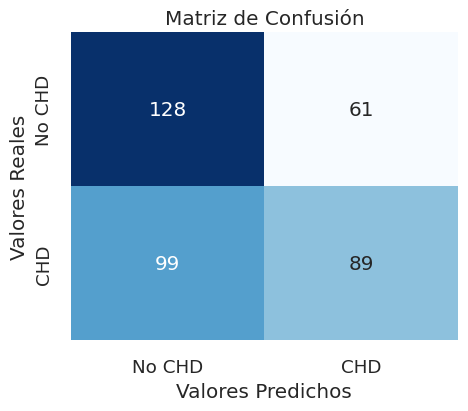

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definimos las etiquetas de las clases
classes = ['No CHD', 'CHD']

# Creamos el heatmap
plt.figure(figsize=(5, 4))
sns.set(font_scale=1.2)  # Ajustamos el tamaño de la fuente
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()



---



## Referencia de la matriz de confusión:

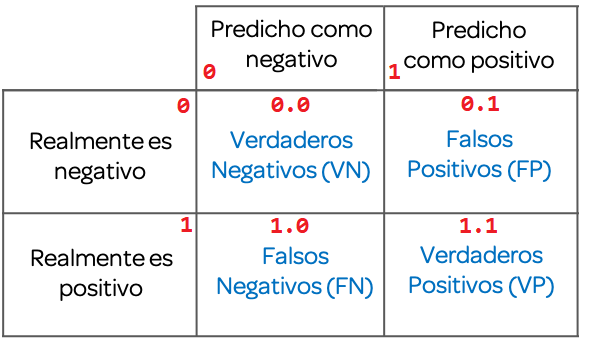



---



## Sensibilidad & Especificidad:

* Una **Curva ROC** (Receiver operating characteristic) es un gráfico de la sensibilidad frente a la especificidad.

* La **Sensibilidad (recall) es la tasa de verdaderos positivos**.
  * Sensitivity (TP / TP + FN)

* La **Especificidad es la tasa de verdaderos negativos**.
  * Specificity (TN / TN + FP)


## Sensibilidad & Especificidad con Scikit-learn:


In [42]:
from sklearn.metrics import recall_score, precision_recall_fscore_support

# Sensitivity is the same as recall, so it is easy to define.
sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]


#print("sensitivity:", sensitivity_score(y_test, y_pred))
print (f'\nNuestro modelo tiene una Sensibilidad del {round(sensitivity_score(y_test, y_pred)*100)}%')


#print("specificity:", specificity_score(y_test, y_pred))
print (f'\nNuestro modelo tiene una Especificidad del {round(specificity_score(y_test, y_pred)*100)}%')


Nuestro modelo tiene una Sensibilidad del 47%

Nuestro modelo tiene una Especificidad del 68%


## La curva ROC (Receiver operating characteristic):


* La curva ROC puede mostrar el rendimiento, de un solo modelo, o de muchos modelos.

* Cuanto más se acerque la curva a la esquina superior izquierda, mejor será el rendimiento.

* La línea nunca debe caer por debajo de la línea diagonal, ya que eso significaría que su rendimiento es peor que un modelo aleatorio.

* La función toma los valores objetivo verdaderos y las probabilidades predichas de nuestro modelo.

* La función roc_curve devuelve una matriz de tasas de falsos positivos, una matriz de tasas de verdaderos positivos y los umbrales.

  * La tasa de falsos positivos es **1-especificidad (eje x)**,
  * la tasa de verdaderos positivos es la **sensibilidad (eje y)**.


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


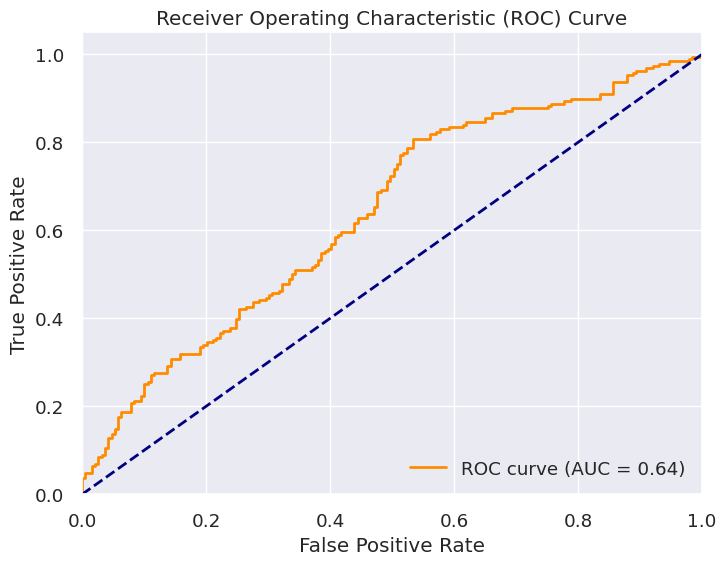

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculamos las probabilidades de pertenecer a la clase positiva
y_probs = model.predict(X_test)  # Probabilidades para la clase positiva

# Si el modelo es binario con una sola salida, no necesitamos el índice
# En caso de tener más de un valor, asegúrate de que sea un modelo de múltiples clases
if y_probs.shape[1] > 1:
    y_probs = y_probs[:, 1]  # Para el caso de múltiples clases, seleccionamos la clase positiva

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculamos el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()





---



## Graficamos las métricas de entrenamiento y validación

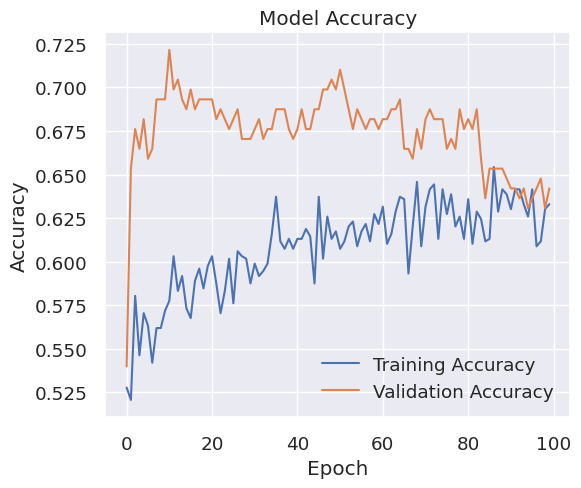

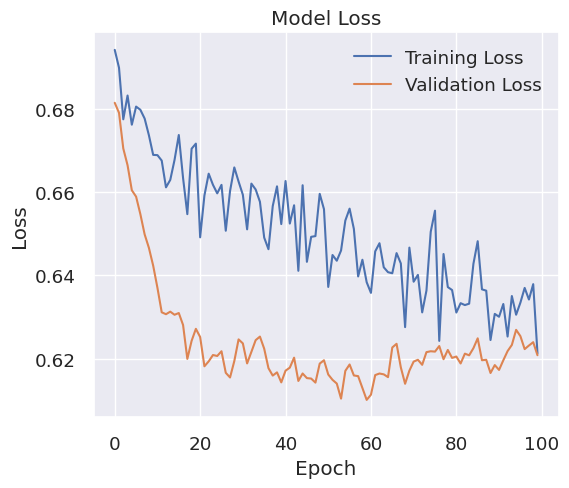

In [47]:
# Graficamos las métricas de entrenamiento y validación
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



---



## Guardamos el modelo en la ruta especificada

In [48]:
# Guardamos el modelo en la ruta especificada
from keras.models import load_model

# Guardamos el modelo en la ruta especificada
from keras.models import load_model

# Guardar el modelo entrenado en la ruta especificada
model.save('/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_NN_trained_model.keras')

# Para cargar el modelo guardado en el futuro
# model = load_model('/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_NN_trained_model.keras')




---



##Llamamos al modelo entrenado para realizar una predicción por consola:

In [49]:
import pandas as pd
import numpy as np
from keras.models import load_model

# Cargamos el modelo entrenado
model = load_model('/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_NN_trained_model.keras')

#Obtenemos los datos del encabezado del dataset para crear el listado variables_paciente a partir de ENC
ENC_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_preprocessed.csv")
#ENC_df = ENC_df.drop(columns=['ID_paciente'])
ENC= ENC_df[['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP','diaBP', 'currentSmoker']]

# Obtenemos los nombres de las columnas del DataFrame ENC
variables_paciente = ENC.columns.tolist()

# Imprimir la lista de variables_paciente
print(variables_paciente)
# Dps usamos la lista para solicitar los datos por consola

['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP', 'diaBP', 'currentSmoker']


##Ingresamos los datos por consola:

In [50]:
def predecir_chd(modelo, datos_paciente, scaler):
    # Convertimos los datos del paciente a un DataFrame
    paciente_df = pd.DataFrame(datos_paciente, index=[0])

    # Estandarizamos los datos del paciente con el mismo scaler usado durante el entrenamiento
    paciente_scaled = scaler.transform(paciente_df)

    # Realizamos la predicción de probabilidad usando model.predict para redes neuronales de Keras
    pred_prob = modelo.predict(paciente_scaled)  # Probabilidad de la clase positiva

    # Convertimos la probabilidad en clase binaria (0 o 1) con un umbral de 0.5
    pred_class = (pred_prob > 0.5).astype(int)

    # Imprimimos el resultado de la predicción binaria y el porcentaje de riesgo
    print("-" * 100)
    print(f"El riesgo estimado de enfermedad coronaria a 10 años es del: {pred_prob[0][0] * 100:.2f}%, predicción binaria: {pred_class[0][0]}")


# Pedimos por consola al usuario que ingrese los valores de las variables del paciente
datos_paciente = {}
for variable in variables_paciente:
    valor = input(f"Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de {variable}: ")
    datos_paciente[variable] = float(valor) if variable != 'male' else 1 if valor.lower() == 'male' else 0

# Realizamos la predicción
predecir_chd(model, datos_paciente, s_scaler)


Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de male: 1
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de prevalentHyp: 1
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de diabetes: 1
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de totChol: 350
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de prevalentStroke: 1
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de BMI: 42
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de sysBP: 160
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de diaBP: 100
Ingrese el valor (en binario 0 o 1 para variables binarias, numérico para otras) de currentSmoker: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
-------------------------------------------------------------------------------------------



---



###Llamamos al modelo entrenado para realizar una predicción a partir de un dataset con datos de pacientes: 😃

In [ ]:
import pandas as pd
import numpy as np
from keras.models import load_model

# Cargamos el modelo entrenado
model = load_model('/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_NN_trained_model.keras')

# Leemos un nuevo conjunto de datos (Crear un nuevo dataset con casos: CHD_nuevos_casos.csv)
nuevo_caso = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Framingham_CHD/CHD_nuevos_casos.csv")
nuevo_caso_df= nuevo_caso[['male', 'prevalentHyp', 'diabetes', 'totChol', 'prevalentStroke', 'BMI', 'sysBP','diaBP', 'currentSmoker']]

nuevo_caso_df.head()

,male,prevalentHyp,diabetes,totChol,prevalentStroke,BMI,sysBP,diaBP,currentSmoker
0,1,0,0,195.0,0,26.97,106.0,70.0,0
1,0,0,0,250.0,0,28.73,121.0,81.0,0
2,1,0,0,245.0,0,25.34,127.5,80.0,1
3,0,1,0,225.0,0,28.58,150.0,95.0,1
4,0,0,0,285.0,0,23.10,130.0,84.0,1


In [ ]:
# Estandarizamos los datos del nuevo conjunto porque nuestro modelo fue entrenado con datos normalizados
nuevo_caso_scaled = s_scaler.transform(nuevo_caso_df)

# hacemos las predicciones con el modelo cargado
predicciones = model.predict(nuevo_caso_scaled)

# Mostramos nuestros resultados
for i, pred in enumerate(predicciones):
    riesgo_porcentaje = pred[0] * 100  # Convertimos la probabilidad a porcentaje
    pred_class = 1 if pred[0] > 0.5 else 0  # Clasificación binaria con umbral de 0.5
    print(f"Paciente {i+1}: Riesgo estimado de CHD a 10 años: {riesgo_porcentaje:.2f}% - Predicción binaria: {pred_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Paciente 1: Riesgo estimado de CHD a 10 años: 39.24% - Predicción binaria: 0
Paciente 2: Riesgo estimado de CHD a 10 años: 31.20% - Predicción binaria: 0
Paciente 3: Riesgo estimado de CHD a 10 años: 53.77% - Predicción binaria: 1
Paciente 4: Riesgo estimado de CHD a 10 años: 46.66% - Predicción binaria: 0
Paciente 5: Riesgo estimado de CHD a 10 años: 46.90% - Predicción binaria: 0
Paciente 6: Riesgo estimado de CHD a 10 años: 54.05% - Predicción binaria: 1
Paciente 7: Riesgo estimado de CHD a 10 años: 36.40% - Predicción binaria: 0
Paciente 8: Riesgo estimado de CHD a 10 años: 46.60% - Predicción binaria: 0
Paciente 9: Riesgo estimado de CHD a 10 años: 50.99% - Predicción binaria: 1
Paciente 10: Riesgo estimado de CHD a 10 años: 65.82% - Predicción binaria: 1
Paciente 11: Riesgo estimado de CHD a 10 años: 32.45% - Predicción binaria: 0
Paciente 12: Riesgo estimado de CHD a 10 años: 29.02% - Predicción binaria: 0
Paciente 13: Riesgo estimado de CHD



---





---

